# World Happiness Report Data Analysis Project
Ashley Bissell
AD450 Final Project Winter 2025

## Thesis Statement:
Exploring factors that have the strongest impact on world happiness scores, and how happiness differs between countries and across time.

## Import Statements

In [28]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix 
from scipy.stats import linregress

## Load Data

In [76]:
happiness_df = pd.read_csv("world_happiness_report.csv")
happiness_df

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
0,China,2022,4.39,44984.68,0.53,71.11,0.41,-0.05,0.83,14.98,0.52,1311940760,78.71,8.88,0.34,76.44,46.06,8.92,62.75,8.59,74.40,70.30,0.29,61.38
1,UK,2015,5.49,30814.59,0.93,63.14,0.89,0.04,0.84,19.46,0.83,1194240877,50.87,5.03,0.72,53.38,46.43,4.43,53.11,8.76,91.74,73.32,0.76,80.18
2,Brazil,2009,4.65,39214.84,0.03,62.36,0.01,0.16,0.59,16.68,0.95,731100898,48.75,5.22,0.23,82.40,31.03,3.78,33.30,6.06,71.80,28.99,0.94,72.65
3,France,2019,5.20,30655.75,0.77,78.94,0.98,0.25,0.63,2.64,0.70,1293957314,81.78,5.69,0.68,46.87,57.65,4.43,90.59,6.36,86.16,45.76,0.48,55.14
4,China,2022,7.28,30016.87,0.05,50.33,0.62,0.18,0.92,7.70,0.92,1432971455,82.39,6.33,0.50,60.38,28.54,7.66,59.33,3.00,71.10,65.67,0.12,51.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,South Africa,2005,7.43,1504.73,0.17,50.20,0.99,0.27,0.69,2.16,0.70,934088568,37.02,5.71,0.96,83.55,25.65,6.69,66.67,8.18,91.14,28.88,0.07,85.95
3996,India,2018,5.71,50182.85,0.96,67.67,0.84,0.43,0.88,7.19,0.94,1143441630,30.77,7.59,0.70,89.03,41.70,9.57,82.84,8.42,83.05,55.50,0.74,91.96
3997,South Africa,2021,6.23,6158.53,0.22,67.08,0.42,0.19,0.10,2.25,0.93,1175677845,55.66,4.71,0.59,67.74,24.58,8.02,81.29,6.97,72.08,61.16,0.29,89.19
3998,Brazil,2014,5.73,38214.54,0.46,55.72,0.74,0.28,0.46,8.74,0.78,1163097834,50.39,6.29,0.21,62.73,56.21,5.60,30.44,4.67,87.21,49.50,0.11,85.44


## Exploratory Data Analysis

### Summarize the data
I used .info() to see all of the columns and data types

In [33]:
print("Happiness Dataset Info: \n")
print(happiness_df.info()) 


Happiness Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    4000 non-null   object 
 1   Year                       4000 non-null   int64  
 2   Happiness_Score            4000 non-null   float64
 3   GDP_per_Capita             4000 non-null   float64
 4   Social_Support             4000 non-null   float64
 5   Healthy_Life_Expectancy    4000 non-null   float64
 6   Freedom                    4000 non-null   float64
 7   Generosity                 4000 non-null   float64
 8   Corruption_Perception      4000 non-null   float64
 9   Unemployment_Rate          4000 non-null   float64
 10  Education_Index            4000 non-null   float64
 11  Population                 4000 non-null   int64  
 12  Urbanization_Rate          4000 non-null   float64
 13  Life_Satisfaction     

### Get basic statistics
I used .describe() to see the ranges of the values and make sure data seems reasonable/real

In [34]:
print("Summary Statistics: \n")
print(happiness_df.describe())

Summary Statistics: 

              Year  Happiness_Score  GDP_per_Capita  Social_Support  \
count  4000.000000      4000.000000     4000.000000     4000.000000   
mean   2014.670750         5.455005    30482.009953        0.505860   
std       5.724075         1.427370    17216.122032        0.286202   
min    2005.000000         3.000000     1009.310000        0.000000   
25%    2010.000000         4.237500    15425.125000        0.260000   
50%    2015.000000         5.430000    29991.255000        0.510000   
75%    2020.000000         6.662500    45763.085000        0.750000   
max    2024.000000         8.000000    59980.720000        1.000000   

       Healthy_Life_Expectancy      Freedom   Generosity  \
count              4000.000000  4000.000000  4000.000000   
mean                 67.917605     0.502723     0.143960   
std                  10.172091     0.285219     0.200088   
min                  50.000000     0.000000    -0.200000   
25%                  59.177500     0.2

### Get value counts of a categorical column 
I used .value_counts() to see how the data was spread across countries


In [35]:
print("Value Counts: \n")
for col in happiness_df.columns:
    if happiness_df[col].dtype == "object":
        print(happiness_df[col].value_counts())
        print()

Value Counts: 

Country
USA             429
France          415
Germany         413
Brazil          404
Australia       400
India           399
UK              395
Canada          386
South Africa    385
China           374
Name: count, dtype: int64



### Get histograms of numeric columns
I used .hist() to see how each column's data is spread

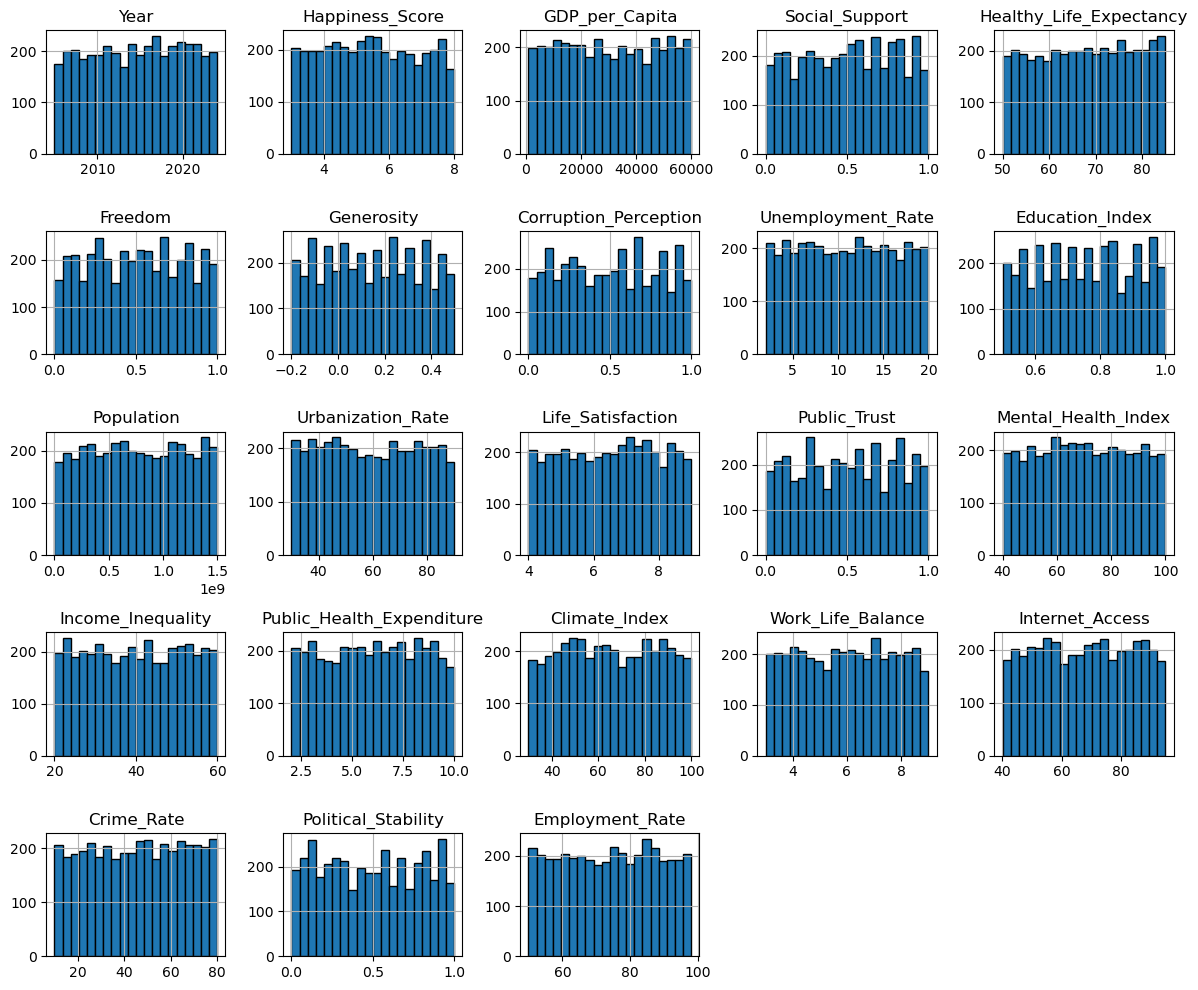

In [36]:
happiness_df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()

### Look for relationships in the data
I used scatter_matrix to see if there were any obvious connections between happiness_score and any other variables, or between subsets of variables (all on one scatter_matrix was too difficult to see due to large number of variables)

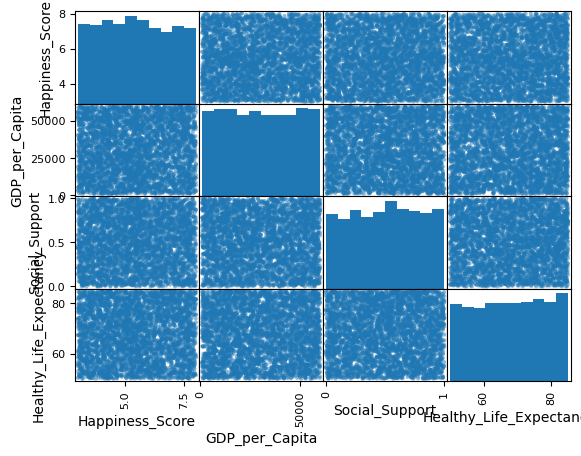

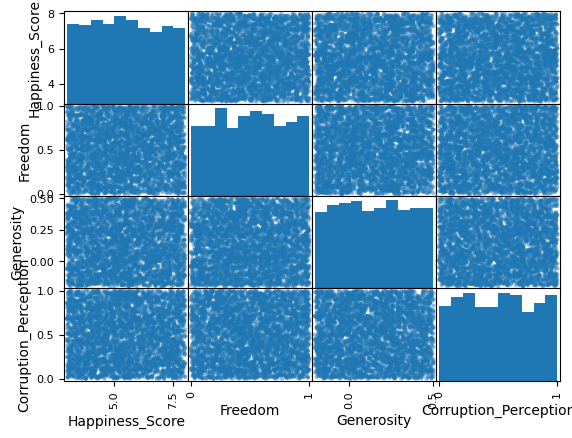

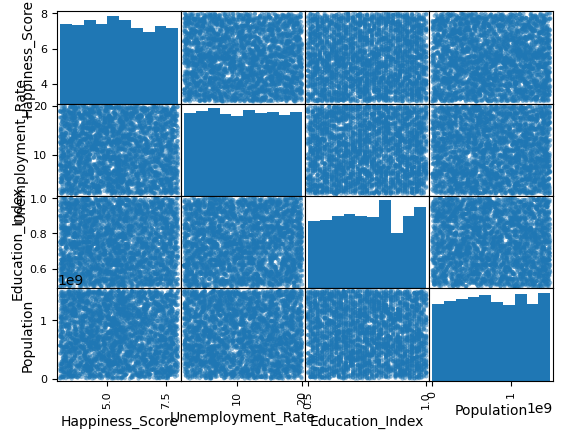

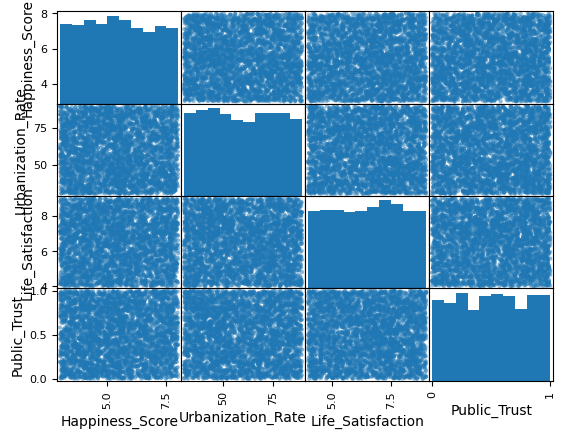

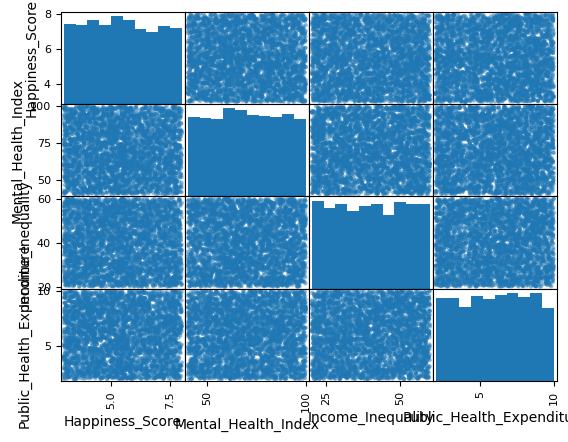

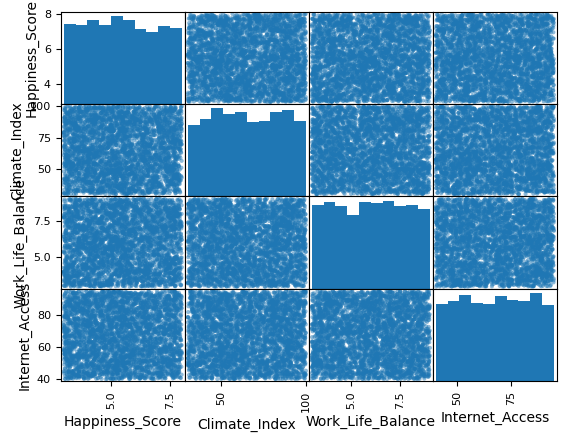

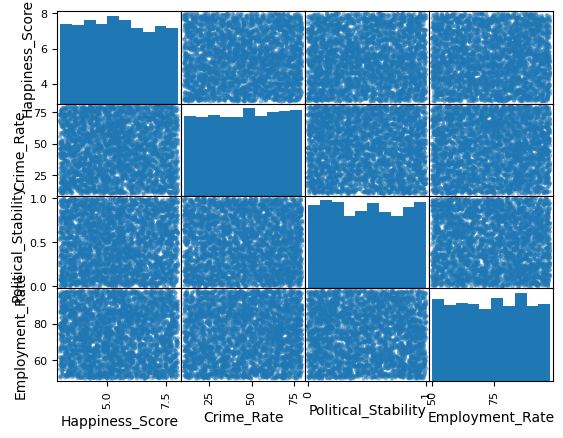

In [37]:
features_1 = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy']
scatter_matrix(happiness_df[features_1])
plt.show()
features_2 = ['Happiness_Score', 'Freedom', 'Generosity', 'Corruption_Perception']
scatter_matrix(happiness_df[features_2])
plt.show()
features_3 = ['Happiness_Score', 'Unemployment_Rate', 'Education_Index', 'Population']
scatter_matrix(happiness_df[features_3])
plt.show()
features_4 = ['Happiness_Score', 'Urbanization_Rate', 'Life_Satisfaction', 'Public_Trust']
scatter_matrix(happiness_df[features_4])
plt.show()
features_5 = ['Happiness_Score', 'Mental_Health_Index', 'Income_Inequality', 'Public_Health_Expenditure']
scatter_matrix(happiness_df[features_5])
plt.show()
features_6 = ['Happiness_Score', 'Climate_Index', 'Work_Life_Balance', 'Internet_Access']
scatter_matrix(happiness_df[features_6])
plt.show()
features_7 = ['Happiness_Score', 'Crime_Rate', 'Political_Stability', 'Employment_Rate']
scatter_matrix(happiness_df[features_7])
plt.show()

## Data Cleaning and Transformation

### Filling NaN values
I used .isna() to find missing values (there were none)

In [38]:
nan_rows = happiness_df[happiness_df.isna().any(axis=1)]
if nan_rows.empty:
    print("There is no missing data.")
else:
    print("Rows with missing data:")
    print(nan_rows)

There is no missing data.


### 2. Correct data dtype issues
I used .to_datetime to convert year in int64 to year in datetime (later I have to reverse this)

In [39]:
happiness_df['Year'] = pd.to_datetime(happiness_df['Year'], format='%Y')
print("New dtype for Year column: ", happiness_df['Year'].dtype)

New dtype for Year column:  datetime64[ns]


## Data Joining

### Merging two or more dataframes on a column
I created a dataframe of continents, and merged on country

In [55]:
continent_data = {
    'Country': ['USA', 'France', 'Germany', 'Brazil', 'Australia', 'India', 'UK', 'Canada', 'South Africa', 'China'],
    'Continent': ['North America', 'Europe', 'Europe', 'South America', 'Australia', 'Asia', 'Europe', 'North America', 'Africa', 'Asia']
}
continent_df = pd.DataFrame(continent_data)
print(continent_df)
happiness_with_cont = happiness_df.merge(continent_df, on='Country', how='left')
pd.set_option('display.max_columns', None)  # Show all columns
happiness_with_cont.head()

        Country      Continent
0           USA  North America
1        France         Europe
2       Germany         Europe
3        Brazil  South America
4     Australia      Australia
5         India           Asia
6            UK         Europe
7        Canada  North America
8  South Africa         Africa
9         China           Asia


,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Year_num,Continent
0,China,2022-01-01,4.39,44984.68,0.53,71.11,0.41,-0.05,0.83,14.98,0.52,1311940760,78.71,8.88,0.34,76.44,46.06,8.92,62.75,8.59,74.40,70.30,0.29,61.38,2022,Asia
1,UK,2015-01-01,5.49,30814.59,0.93,63.14,0.89,0.04,0.84,19.46,0.83,1194240877,50.87,5.03,0.72,53.38,46.43,4.43,53.11,8.76,91.74,73.32,0.76,80.18,2015,Europe
2,Brazil,2009-01-01,4.65,39214.84,0.03,62.36,0.01,0.16,0.59,16.68,0.95,731100898,48.75,5.22,0.23,82.40,31.03,3.78,33.30,6.06,71.80,28.99,0.94,72.65,2009,South America
3,France,2019-01-01,5.20,30655.75,0.77,78.94,0.98,0.25,0.63,2.64,0.70,1293957314,81.78,5.69,0.68,46.87,57.65,4.43,90.59,6.36,86.16,45.76,0.48,55.14,2019,Europe
4,China,2022-01-01,7.28,30016.87,0.05,50.33,0.62,0.18,0.92,7.70,0.92,1432971455,82.39,6.33,0.50,60.38,28.54,7.66,59.33,3.00,71.10,65.67,0.12,51.55,2022,Asia


## Data Visualization

### Asking thoughtful analytical questions
Questions:
1. Has the USA happiness score trended (upward or downward) between 2005 and 2024?
2. What factors correlate most strongly with happiness_score for USA?
3. Is the correlation between Employment_Rate and Happiness statistically significant?
4. What might be causing the downward trend in Happiness_Score since 2021?
5. Is the correlation of Happiness Score with healthy life expectancy from 2021-2024 for the USA statistically significant?



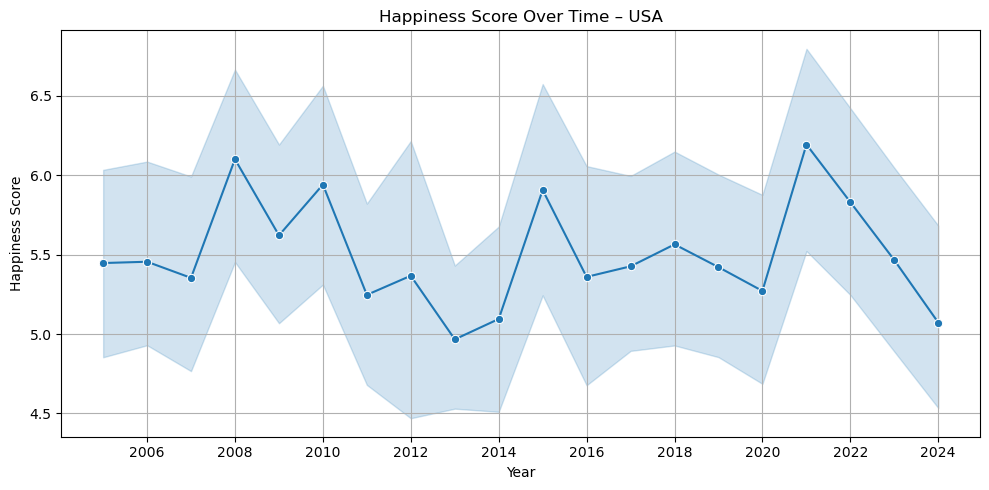

Happiness Score vs Year Linear Regression Fit: 
Slope: 0.001
R-squared: 0.000
P-value: 0.928


In [ ]:
# 1. Has the USA happiness score trended (upward or downward) between 2005 and 2024?
# Plot happiness score of usa vs year
usa_data = happiness_with_cont[happiness_with_cont['Country'] == 'USA'].sort_values('Year')
plt.figure(figsize=(10, 5))
sns.lineplot(data=usa_data, x='Year', y='Happiness_Score', marker='o')
plt.title('Happiness Score Over Time – USA')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()
# Fit a linear regression to see if there is any correlation between year and happiness_score for the USA
usa_data['Year_num'] = usa_data['Year'].dt.year
slope, intercept, r_value, p_value, std_err = linregress(usa_data['Year_num'], usa_data['Happiness_Score'])
print("Happiness Score vs Year Linear Regression Fit: ")
print(f"Slope: {slope:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.3f}")
# No correlation observed


Employment_Rate              0.089523
Climate_Index                0.087668
Urbanization_Rate           -0.084115
Freedom                      0.080122
Generosity                  -0.065176
Public_Trust                 0.064991
Population                   0.056887
Unemployment_Rate           -0.050649
Work_Life_Balance            0.044730
Crime_Rate                   0.041565
Healthy_Life_Expectancy      0.038825
Education_Index              0.036260
Mental_Health_Index          0.032750
Income_Inequality           -0.032510
Corruption_Perception       -0.032418
Life_Satisfaction            0.030994
Social_Support               0.024892
Internet_Access             -0.024134
Political_Stability          0.022863
GDP_per_Capita              -0.014211
Public_Health_Expenditure   -0.004781
Name: Happiness_Score, dtype: float64


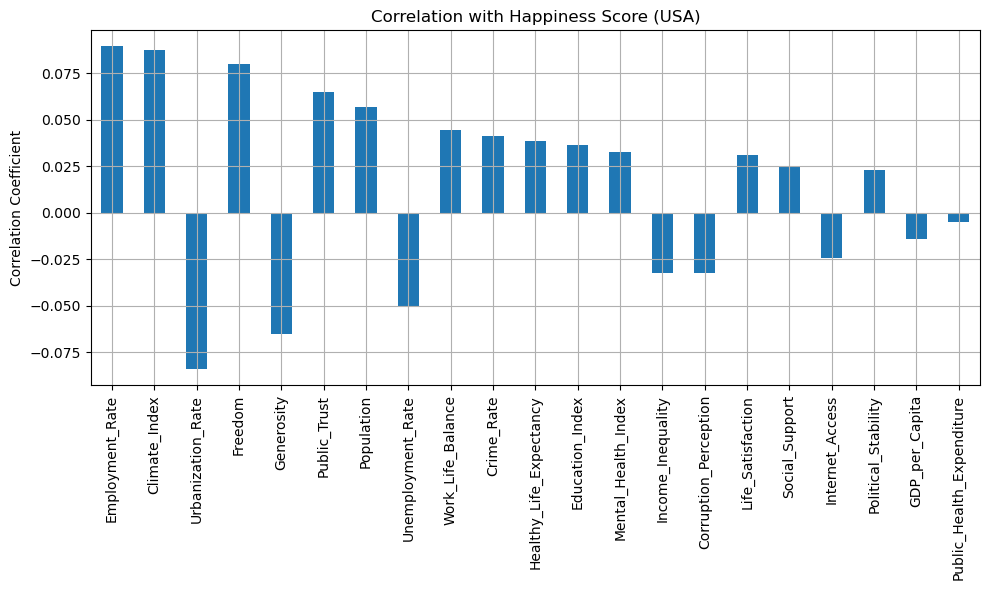

In [42]:
# 2. What factors correlate most strongly with happiness_score for USA?
# Find the pearson correlation coefficients for each numeric column
# Filter for USA
usa_df = happiness_with_cont[happiness_with_cont['Country'] == 'USA'].copy()
# Select only numeric columns
numeric_usa = usa_df.select_dtypes(include='number')  # this grabs only numeric columns (e.g., float64, int64)
# Compute correlation with Happiness_Score
correlations = numeric_usa.corr()
# Extract correlations with Happiness_Score
happiness_corr = correlations['Happiness_Score'].drop('Happiness_Score')  # drop self-correlation
# Sort by strength of correlation
happiness_corr_sorted = happiness_corr.sort_values(key=abs, ascending=False)
# Print or display
print(happiness_corr_sorted)
# Make bar plot to show these results
plt.figure(figsize=(10, 6))
happiness_corr_sorted.plot(kind='bar')
plt.title('Correlation with Happiness Score (USA)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


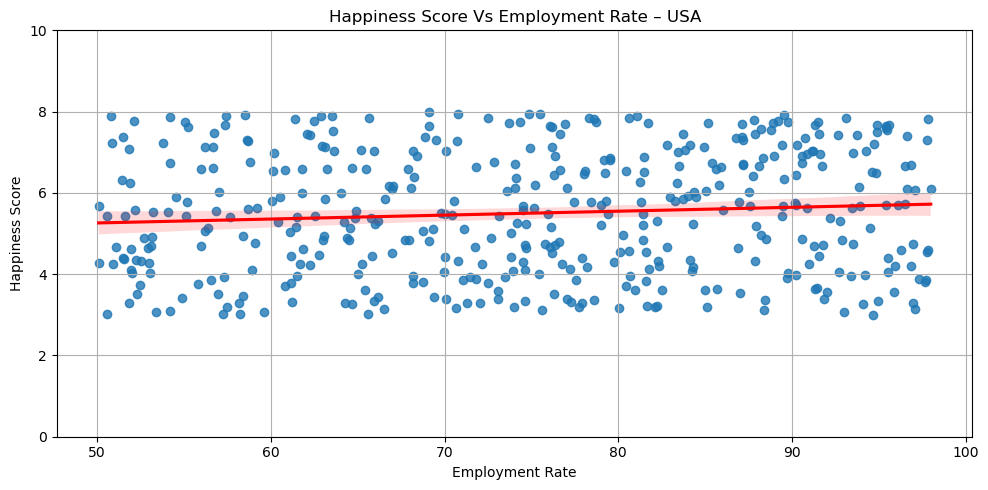

Happiness Score vs Employment Rate Linear Regression Fit: 
Slope: 0.010
R-squared: 0.008
P-value: 0.064


In [50]:
# 3. Is the correlation between Employment_Rate and Happiness statistically significant with p-value <0.05?
# Plot happiness score of usa vs Employment_Rate
plt.figure(figsize=(10, 5))
sns.regplot(data=usa_data, x='Employment_Rate', y='Happiness_Score', scatter=True, marker='o', line_kws={"color": "red"})
plt.title('Happiness Score Vs Employment Rate – USA')
plt.xlabel('Employment Rate')
plt.ylabel('Happiness Score')
plt.ylim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()
# Fit a linear regression to see if there is any correlation between Employment_Rate and Happiness_Score for the USA
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(usa_data['Employment_Rate'], usa_data['Happiness_Score'])
print("Happiness Score vs Employment Rate Linear Regression Fit: ")
print(f"Slope: {slope_2:.3f}")
print(f"R-squared: {r_value_2**2:.3f}")
print(f"P-value: {p_value_2:.3f}")
# No correlation observed

Healthy_Life_Expectancy      0.295653
Year_num                    -0.267636
Climate_Index                0.263075
Public_Trust                 0.258313
Education_Index              0.250047
Work_Life_Balance            0.245721
Urbanization_Rate           -0.237276
Life_Satisfaction            0.192366
GDP_per_Capita              -0.186783
Corruption_Perception       -0.160862
Employment_Rate              0.152269
Crime_Rate                  -0.111734
Freedom                      0.085122
Social_Support               0.084272
Public_Health_Expenditure   -0.064782
Income_Inequality           -0.044408
Internet_Access             -0.027168
Generosity                  -0.023853
Mental_Health_Index          0.018896
Political_Stability          0.005865
Population                   0.005610
Unemployment_Rate            0.000419
Name: Happiness_Score, dtype: float64


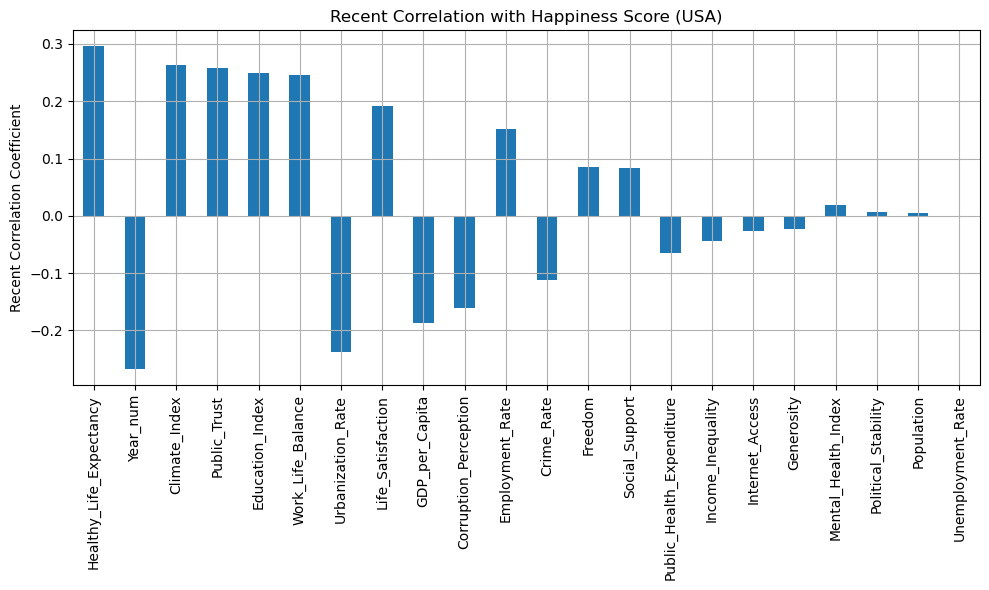

In [44]:
# 4. What might be causing the downward trend in Happiness_Score since 2021?
# Filter the data to be just for the USA from 2021-2024
happiness_df['Year_num'] = happiness_df['Year'].dt.year
usa_recent = happiness_df[(happiness_df['Country'] == 'USA') & (happiness_df['Year_num'].between(2021, 2024))]
# Re-evaluate pearson correlations
# Select only numeric columns
numeric_usa_recent = usa_recent.select_dtypes(include='number')  # this grabs only numeric columns (e.g., float64, int64)
# Compute correlation with Happiness_Score
correlations_recent = numeric_usa_recent.corr()
# Extract correlations with Happiness_Score
happiness_corr_recent = correlations_recent['Happiness_Score'].drop('Happiness_Score')  # drop self-correlation
# Sort by strength of correlation
happiness_corr_recent_sorted = happiness_corr_recent.sort_values(key=abs, ascending=False)
# Print or display
print(happiness_corr_recent_sorted)
# Make bar plot to show these results
plt.figure(figsize=(10, 6))
happiness_corr_recent_sorted.plot(kind='bar')
plt.title('Recent Correlation with Happiness Score (USA)')
plt.ylabel('Recent Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

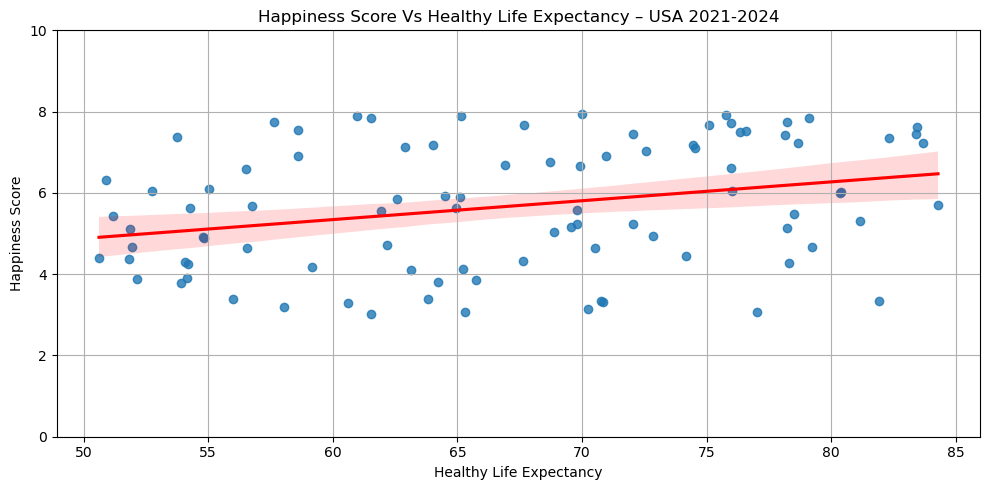

Happiness Score vs Healthy Life Expectancy- USA 2021-2024 Linear Regression Fit: 
Slope: 0.046
R-squared: 0.087
P-value: 0.004


In [51]:
# 5. Is the correlation of Happiness Score with healthy life expectancy from 2021-2024 
# for the USA statistically significant with p-value <0.05?
# Plot happiness score of usa from 2021-2024 vs Healthy_Life_Expectancy
plt.figure(figsize=(10, 5))
# sns.lineplot(data=usa_recent, x='Healthy_Life_Expectancy', y='Happiness_Score', marker='o')
sns.regplot(data=usa_recent, x='Healthy_Life_Expectancy', y='Happiness_Score', scatter=True, marker='o', line_kws={"color": "red"})
plt.title('Happiness Score Vs Healthy Life Expectancy – USA 2021-2024')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.ylim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.show()
# Fit a linear regression to see if there is any correlation between Employment_Rate and Happiness_Score for the USA
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(usa_recent['Healthy_Life_Expectancy'], usa_recent['Happiness_Score'])
print("Happiness Score vs Healthy Life Expectancy- USA 2021-2024 Linear Regression Fit: ")
print(f"Slope: {slope_3:.3f}")
print(f"R-squared: {r_value_3**2:.3f}")
print(f"P-value: {p_value_3:.3f}")
# P-value < 0.05, statistically significant 

## Aggregation and Grouping Operations

### Perform an aggregation on a groupby
I grouped by Country and Year, then calculated the mean for all numeric columns

In [57]:
aggregated_df = happiness_df.groupby(['Country', 'Year']).mean(numeric_only=True).reset_index()
aggregated_df

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Year_num
0,Australia,2005-01-01,5.430667,28886.978000,0.528667,68.128667,0.372000,0.181333,0.517333,11.041333,0.778000,7.037067e+08,59.478667,5.685333,0.512667,74.255333,41.165333,5.525333,64.565333,6.286667,71.750667,44.341333,0.552667,72.108667,2005.0
1,Australia,2006-01-01,6.030556,28936.431111,0.677222,63.465000,0.495000,0.100556,0.449444,8.176111,0.736667,7.845685e+08,61.441111,6.388333,0.481111,75.430000,36.857222,5.838333,69.659444,5.902222,67.400556,47.636111,0.516111,73.490556,2006.0
2,Australia,2007-01-01,5.600000,36317.625455,0.505000,65.911818,0.529545,0.167273,0.487273,9.251818,0.780455,6.854900e+08,64.544545,6.788636,0.530000,71.362727,38.910000,6.015000,66.739091,5.937273,68.869545,46.938636,0.564545,73.953636,2007.0
3,Australia,2008-01-01,5.868889,27944.319444,0.467778,69.021111,0.616667,0.170000,0.480556,13.337222,0.696667,8.398988e+08,64.130556,6.635556,0.530000,60.281667,33.376667,6.148333,59.651111,5.455000,73.648889,47.990556,0.658333,69.658333,2008.0
4,Australia,2009-01-01,5.182857,29764.803810,0.524762,69.346667,0.574762,0.088571,0.549048,11.704762,0.756667,6.325921e+08,60.689524,6.563333,0.436667,66.839048,47.194286,6.183810,55.751905,6.234286,69.601905,37.245238,0.486190,73.119048,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,USA,2020-01-01,5.271667,28603.595417,0.494167,68.694167,0.533333,0.162083,0.441667,13.001667,0.792500,7.466417e+08,59.628333,6.985000,0.479167,68.115833,37.422083,5.592083,55.560000,6.275417,71.215417,44.359583,0.460833,76.734167,2020.0
196,USA,2021-01-01,6.193478,27768.738261,0.629565,67.822609,0.413913,0.157391,0.520000,12.670870,0.706522,8.094940e+08,55.241739,6.189565,0.471304,76.129565,43.584783,5.960435,67.486087,6.153478,65.183478,52.734348,0.489565,77.133478,2021.0
197,USA,2022-01-01,5.830370,32318.473704,0.459630,69.417778,0.566296,0.140000,0.521481,9.208889,0.743704,7.504774e+08,62.747778,6.675556,0.428148,78.861852,42.779630,5.602963,64.268889,6.167037,61.077407,38.973333,0.495556,71.130741,2022.0
198,USA,2023-01-01,5.465714,34045.116667,0.534286,61.773333,0.560476,0.168571,0.503810,11.015238,0.729524,7.384771e+08,56.519048,6.005714,0.464762,66.837619,41.858095,6.668095,60.468095,6.246190,65.696667,42.794762,0.423333,72.164286,2023.0


### Further visualization of aggregated data


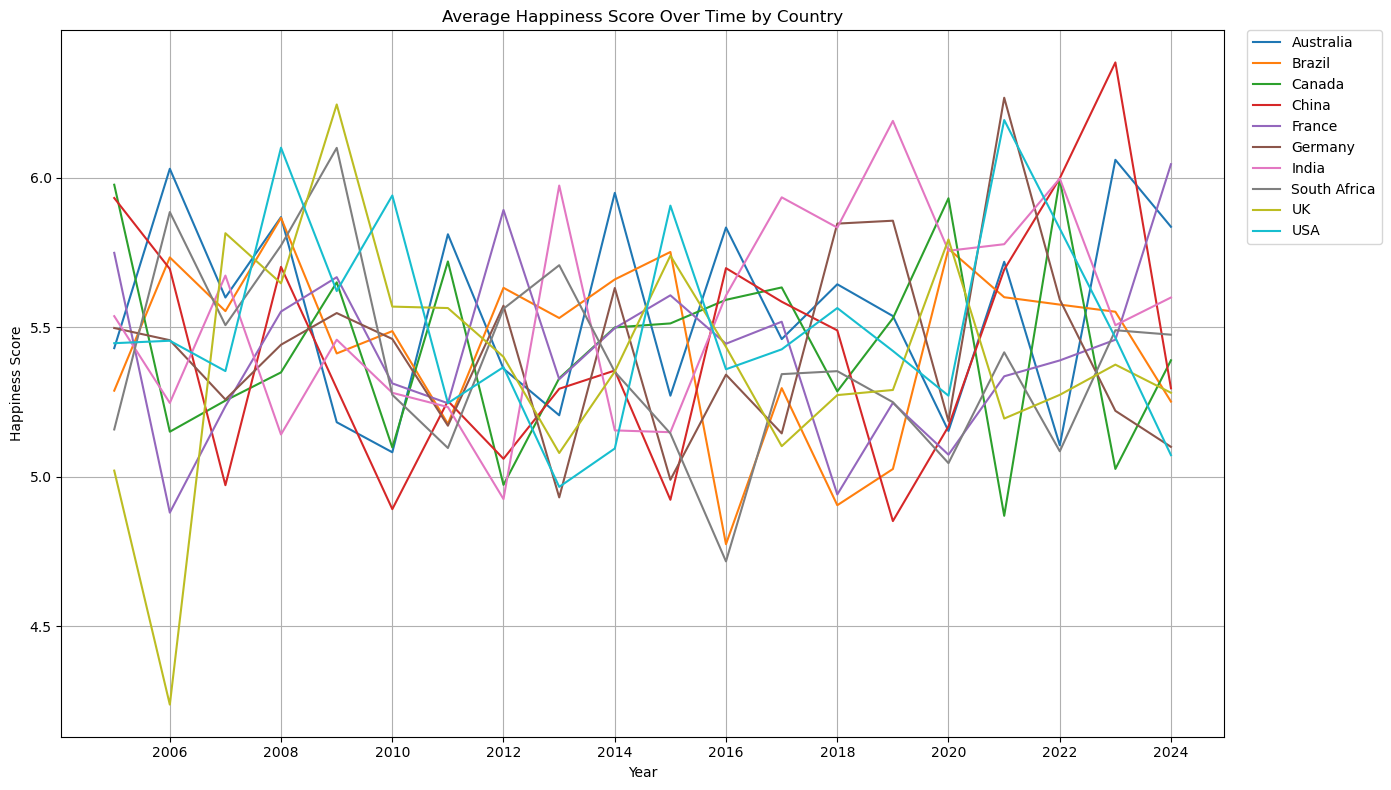

In [ ]:
# Lineplots of all averaged happiness scores by country and year vs time
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='Year', y='Happiness_Score', hue='Country')

plt.title('Average Happiness Score Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.grid(True)
plt.show()

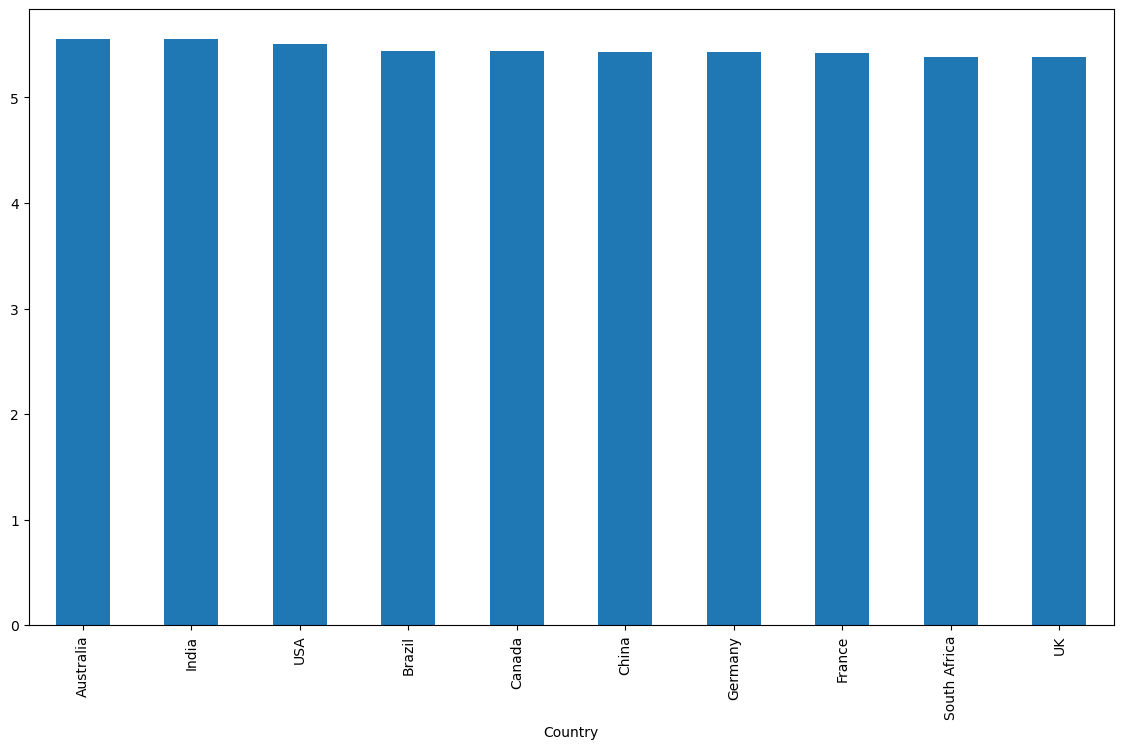

In [ ]:
# Compare average happiness scores by country for all years
plt.figure(figsize=(14, 8))
avg_scores = aggregated_df.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False)
avg_scores.head(10).plot(kind='bar')
plt.show()

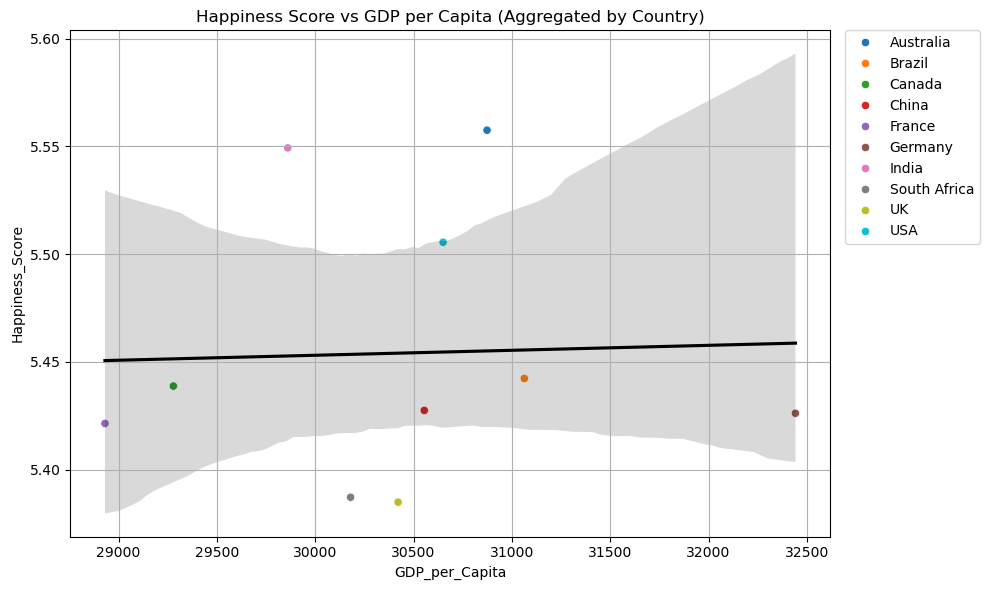

In [75]:
# Aggregate by country only
country_agg = aggregated_df.groupby('Country').mean(numeric_only=True).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=country_agg, x='GDP_per_Capita', y='Happiness_Score', hue='Country')
sns.regplot(data=country_agg, x='GDP_per_Capita', y='Happiness_Score', scatter=False, color='black')

plt.title('Happiness Score vs GDP per Capita (Aggregated by Country)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

## Conclusions
There are multiple data points per country per year in this data set, with no overlap of any columns.  It is possible that this data is an amalgamation of other data sets, or that there is a missing column that would explain why there are multiple points within a year (such as different groups being surveyed, different regions within a country, or different time points within a year).  There are no clear overall correlations between any of the columns and happiness score.  If the data is analyzed for the USA in just the years 2021-2024, there is a slight correlation between healthy life expectancy and happiness score, with both going down together over that time period.  From this data, overall happiness over the period 2005-2024 is highest for Australia, lowest for the UK, and the USA ranks 3rd in this group for overall happiness score.